## <b> Image Pyramids </b>
_An “image pyramid” is a multi-scale representation of an image._

OR

_Sometimes to detect an object (like face or car or anything thing of that sort) in an image, we need to resize or sub-sample the image and run the further analysis. In such cases, we maintain a collection of same image with different resolutions. We call this collection as __Image Pyramid__._

_Image pyramids can also be used for image blending and for image enhancement._

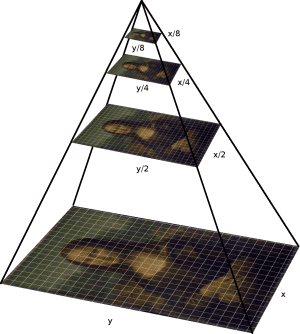

### Import the libraries

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

### Load the image and display it 

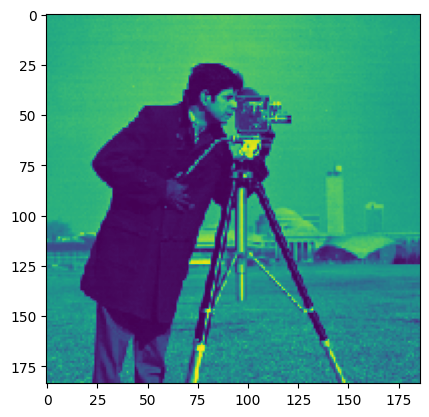

In [36]:
# Load image
img = cv2.imread("Test_image_6.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Display the image
plt.imshow(img)
plt.show()

In [37]:
# Creating the copy of the image for further processing
img_1 = img.copy()
img_2 = img.copy()

### _Gaussian Pyramid_
Gaussian pyramid involves applying repeated Gaussian blurring and downsampling an image until some stopping criteria are met. 

#### <b> Up sizing the image </b>

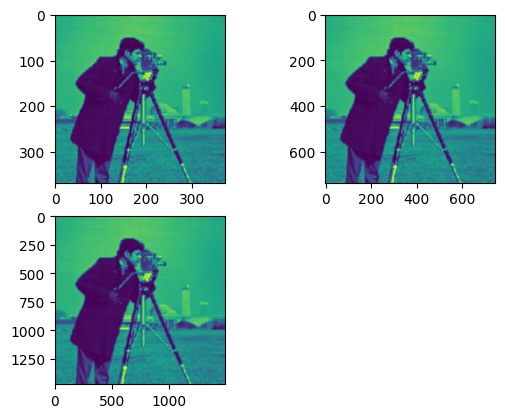

In [38]:
Pyramid_up_Gaus = [img_1]

for i in range(3):
    img_1 = cv2.pyrUp(img_1)
    Pyramid_up_Gaus.append(img_1.copy())
    plt.subplot(2, 2, i + 1), plt.imshow(img_1)
plt.show()    

#### <b> Down sizing the image </b>

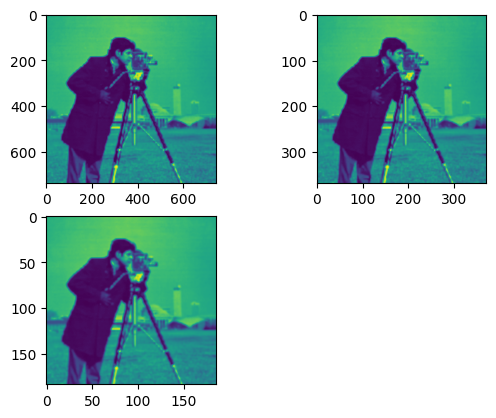

In [39]:
Pyramid_down_Gaus = [img_1]

for i in range(3):
    img_1 = cv2.pyrDown(img_1)
    Pyramid_down_Gaus.append(img_1.copy())
    plt.subplot(2, 2, i + 1), plt.imshow(img_1)
plt.show()    

### _Laplacian Pyramid_
_Laplacian is a high pass filter, so at each level of this pyramid, we will get an edge image as an output._

_We can obtain the Laplacian pyramid by subtracting the Gaussian pyramid levels. Thus the Laplacian of a level is obtained by subtracting that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid._

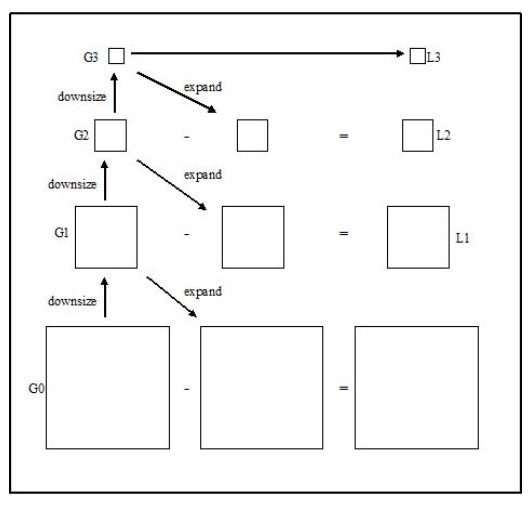

#### __Code__

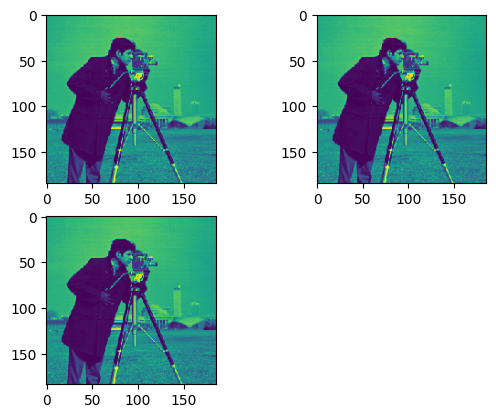

In [43]:
# Last level of Gaussian remains same in Laplacian
laplacian_top = Pyramid_down_Gaus[-1]

# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3,0,-1):
    size = (Pyramid_down_Gaus[i - 1].shape[1], Pyramid_down_Gaus[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(Pyramid_down_Gaus[i], dstsize=size)
    laplacian = cv2.subtract(Pyramid_down_Gaus[i-1], gaussian_expanded)
    laplacian_pyr.append(laplacian)
    plt.subplot(2, 2, i), plt.imshow(img_2)
